In [270]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, locally_linear_embedding

In [271]:
model_type = 'FullyConnected'
dataset_type = 'MNISTDataModule'

In [272]:
closeness_to_left_tensor = torch.zeros((28, 28)) + torch.arange(28) / 28
closeness_to_right_tensor = torch.zeros((28, 28)) + (27 - torch.arange(28)) / 28
closeness_to_top_tensor = (torch.zeros((28, 28)).T + torch.arange(28) / 28).T
closeness_to_bottom_tensor = (torch.zeros((28, 28)).T + (27 - torch.arange(28)) / 28).T
distance_from_center_tensor = torch.minimum(torch.minimum(closeness_to_left_tensor, closeness_to_right_tensor),
                                            torch.minimum(closeness_to_top_tensor, closeness_to_bottom_tensor))

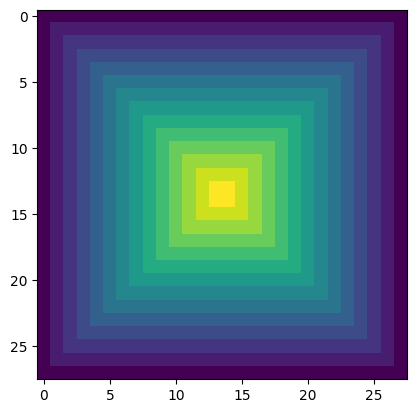

In [273]:
plt.imshow(distance_from_center_tensor.numpy())

torch.Size([784, 50])


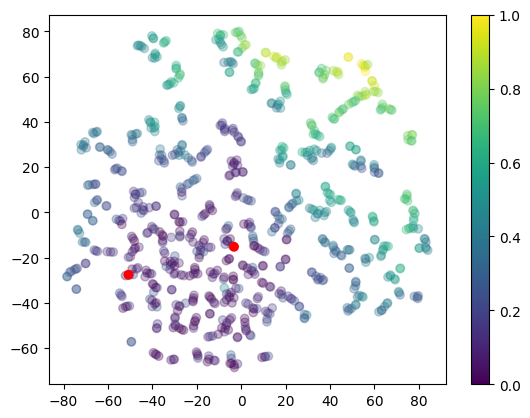

torch.Size([784, 50])


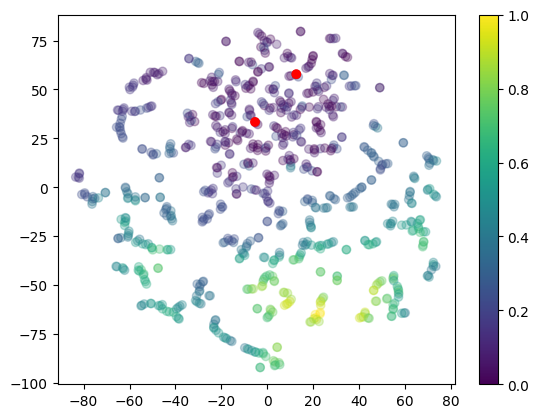

torch.Size([784, 50])


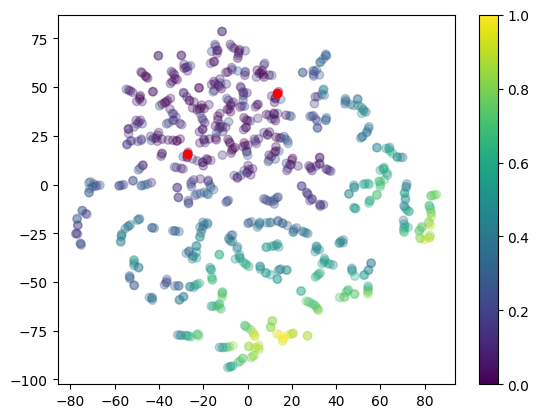

torch.Size([784, 50])


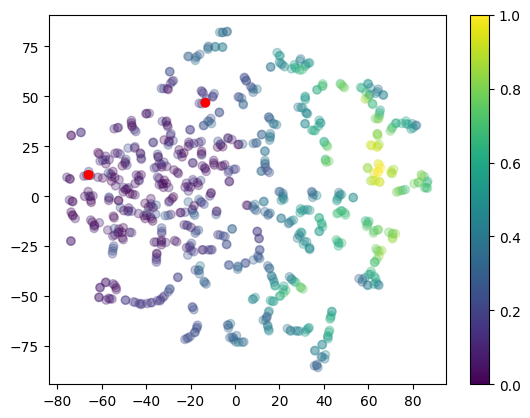

torch.Size([784, 50])


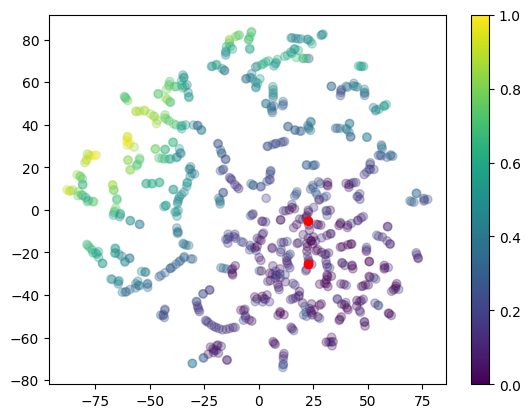

In [274]:
weight_matrices = []
for seed in range(5):
    model = torch.load(f'saved_models/{model_type}-{dataset_type}/seed-{seed}')
    weights = model['layers.0.weight'].T

    print(weights.shape)
    # reduce dimensionality of weights
    pca = PCA(n_components=2)
    #weights_reduced = pca.fit_transform(weights)
    weights_reduced = TSNE(n_components=2, learning_rate='auto',
                           init='random', perplexity=3).fit_transform(weights)

    num_displayed_dots = 784

    #color_vals = np.arange(num_displayed_dots)
    color_vals = distance_from_center_tensor.flatten().numpy()
    plt.scatter(weights_reduced[:num_displayed_dots,0], weights_reduced[:num_displayed_dots,1], label=f'seed-{seed}', c=color_vals, alpha=0.3)


    highlight_idx_0 = 0
    highlight_idx_1 = -1
    plt.scatter([weights_reduced[highlight_idx_0,0], weights_reduced[highlight_idx_1,0]],
                [weights_reduced[highlight_idx_0,1], weights_reduced[highlight_idx_1,1]], label=f'seed-{seed}', c=['red', 'red'])

    plt.colorbar()
    plt.show()


In [275]:
max_distance_indices = []
for seed in range(500):
    model = torch.load(f'saved_models/{model_type}-{dataset_type}/seed-{seed}')
    weights = model['layers.2.weight']

    centroid = weights.mean(axis=0)
    dist_from_centroid = torch.norm(weights - centroid, dim=1)
    max_distance_indices.append(np.argmax(dist_from_centroid.cpu().numpy()))

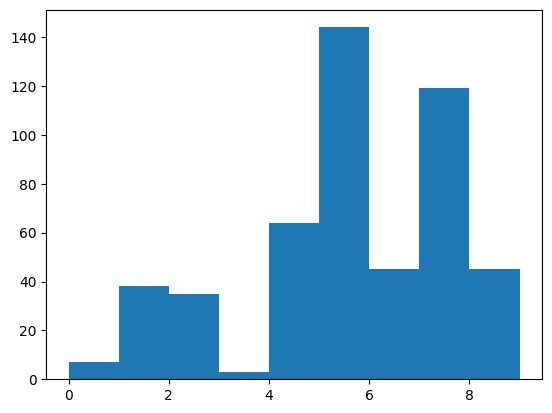

In [276]:
bins  = plt.hist(max_distance_indices, bins=max(max_distance_indices))

In [264]:
model['layers.2.weight'].shape

torch.Size([10, 50])

(array([ 5.,  4.,  6., 13., 10.,  3.,  4.,  2.,  1.,  1.]),
 array([ 3. ,  4.9,  6.8,  8.7, 10.6, 12.5, 14.4, 16.3, 18.2, 20.1, 22. ]),
 <BarContainer object of 10 artists>)

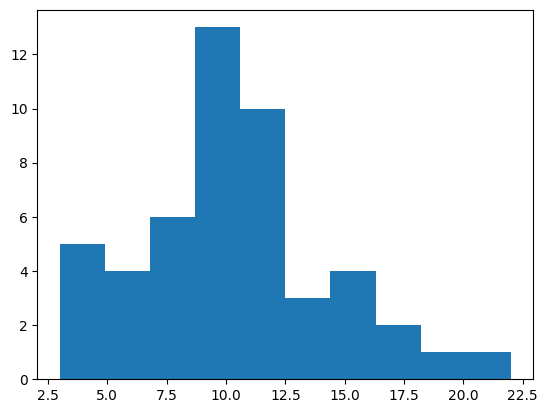

In [265]:
plt.hist(bins[0])